# Logistic-Regression-Breast-Cancer

## Import Software Libraries

In [1]:
import warnings  # Suppress warnings

warnings.filterwarnings("ignore")

import os  # Interact with the operating system.
import sys  # Read system parameters.
from io import StringIO  # Read and write strings as files
from time import time
from urllib.parse import urlparse  # Parse URL and extract path component

import matplotlib  # Create charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data frames.
import requests  # Send HTTP requests
import seaborn as sns  # Streamline charting.
import sklearn  # Perform feature engineering and machine learning.
import statsmodels
from scipy.stats import zscore
from sklearn import datasets  # ML datasets
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split

# Summarize software libraries used.
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- Seaborn {}".format(sns.__version__))
print("- Python {}\n".format(sys.version))
print("- Matplotlib {}\n".format(matplotlib.__version__))
print("\nSummary of software packages complete.\n")

Libraries used in this project:
- NumPy 1.22.3
- pandas 1.4.1
- scikit-learn 1.2.2
- Matplotlib 3.8.4
- Seaborn 0.13.0
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]

- Matplotlib 3.8.4


Summary of software packages complete.



# Load the Dataset.

The first step is to load the data and transform the array into a pandas data frame.

In [2]:
# Capture URL
url = "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/breast_cancer_data.csv"
request = requests.get(url).text

# Save as data frame and copy
cancer = pd.read_csv(StringIO(request))
df = cancer.copy()

# Parse URL
parsed_url = urlparse(url)
path = parsed_url.path
filename = os.path.basename(path)


print(f"Loaded {len(df)} records from {filename}.")

Loaded 569 records from breast_cancer_data.csv.


## Get Acquainted with the Dataset
Examine the data types and check for any missing entries.

**Examine the first 5 observations**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Examine the columns, data types, and check for missing values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Spotlights** 

- The dataset comprises 569 rows and 33 columns in total.
- Among these columns, 31 are designated for float values, 1 for integers, and 1 for objects.
- The 'Unnamed: 32' column is devoid of any records, while an 'id' column is present but deemed unnecessary; both will be eliminated eventually. No other missing records are identified.
- The name for **concave points_worst** will be altered to facilitate access to the feature through dot notation.
- The diagnosis feature classes will be encoded and represented as 0 and 1 opposed to **B**(Benign) and **M**(Malignant)

**Verify that each observations is independent**

To determine whether the count of unique IDs matches the sample size, it is essential to verify that there are no duplicate entries for patients.

In [5]:
uniqueids = df.id.nunique()
idcounts = df.id.count()
print(f"All observations independent? {uniqueids == idcounts}\n")

All observations independent? True



**Examine Diagnosis Values**

The subsequent phase involves encoding the diagnosis feature classes and confirming the presence of two distinct classes within the target(**diagnosis**), thereby establishing it as a binary classification.  The dataset should display unique diagnostic values along with their corresponding frequencies.

**Encode 'Benign' as 0, 'Malignant' as 1**

In [6]:
df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})

In [7]:
diagnosis_class_counts = df["diagnosis"].value_counts()
print("Benign (Class 0):", diagnosis_class_counts[0], "\n")
print("Malignant (Class 1):", diagnosis_class_counts[1], "\n")

Benign (Class 0): 357 

Malignant (Class 1): 212 



**Diagnosis Correlations**

In [8]:
sorted_matrix = df.corr().sort_values("diagnosis", ascending=False)
sorted_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,...,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,NaN
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_worst,0.107187,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,...,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN


**concave_points_worst** has the highest correlation to **diagnosis**. 

**Plot Class Frequencies**

<Axes: title={'center': 'Count (Diagnosis)'}>

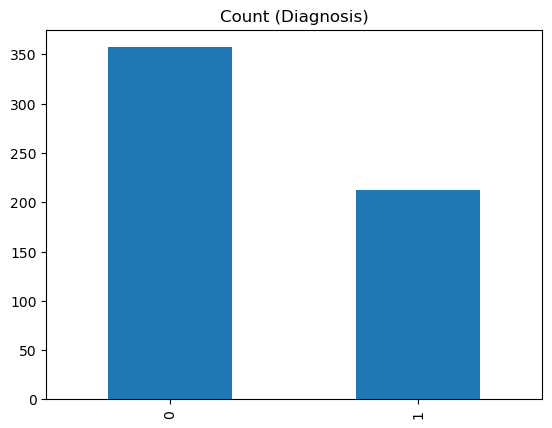

In [9]:
diagnosis_class_counts.plot(kind="bar", title="Count (Diagnosis)", grid=False)

**Examine the Feature Maximum**

It is crucial that, even in cases of significant class imbalance, the smallest class adheres to the established rule of thumb. There should be a limit such that the number of features does not exceed one-tenth of the smallest class size.

In [10]:
maximumfeatures = min(df.diagnosis.value_counts() / 10)
print(f"Maximum features: {maximumfeatures:.0f}")

Maximum features: 21


**Rename Column(s)**

This step renames the concave points_worst. This will allow accessing feature values via dot notation for convenience. 

In [11]:
df = df.rename({"concave points_worst": "concave_points_worst"}, axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Drop Unused Columns** 

The next step is to drop the '**id**' and the '**Unnamed: 32**' columns.

In [12]:
dropped = ["id", "Unnamed: 32"]
df.drop(dropped, inplace=True, axis=1)

print(
    f"The columns '{dropped[0]}'' and '{dropped[1]}' are dropped from the data frame."
)

The columns 'id'' and 'Unnamed: 32' are dropped from the data frame.


In [13]:
with pd.option_context("float_format", "{:.2f}".format):
    print(df.describe())

       diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
count     569.00       569.00        569.00          569.00     569.00   
mean        0.37        14.13         19.29           91.97     654.89   
std         0.48         3.52          4.30           24.30     351.91   
min         0.00         6.98          9.71           43.79     143.50   
25%         0.00        11.70         16.17           75.17     420.30   
50%         0.00        13.37         18.84           86.24     551.10   
75%         1.00        15.78         21.80          104.10     782.70   
max         1.00        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min      

**Examine Outliers**

The next step is to examine a boxplot representing the mean features, identified by a predictors array, to identify and eliminate any apparent outliers. Logistic regression exhibits a notable sensitivity to outliers; therefore, it is essential to eliminate any significantly influential outliers prior to constructing the model. 

Given that the features do not follow a normal distribution it is more insightful to analyze the boxplot of the log-transformed z-scores.

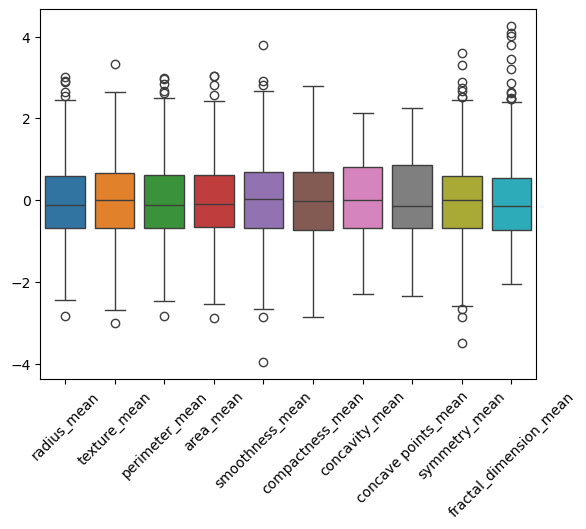

In [14]:
predictors = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
]

sns.boxplot(data=np.log(df[predictors] + 0.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()
plt.close()

**Spotlights** 

All of the following features have outliers: **fractal_dimension_mean, smoothness_mean, symmetry_mean, texture_mean**

**Remove Extreme Outliers** 

Logistic regressions exhibit a notable sensitivity to extreme outliers, which can significantly skew the results of the analysis. The feature known as fractal_dimension_mean contains numerous extreme outliers that exceed the general distribution of its dataset.

The subsequent phase will involve the elimination of any samples that exceed the 99th percentile and re-plotting the filtered data frame. 

In [15]:
filtered_feature = "fractal_dimension_mean"

high_quantile = df[filtered_feature].quantile(0.99)
filtered_dataframe = df[(df["fractal_dimension_mean"] < high_quantile)]

print(f"Quantile: ({filtered_feature}) dropped from the dataset.\n\n")

Quantile: (fractal_dimension_mean) dropped from the dataset.




**Plot Filtered Data Frame**

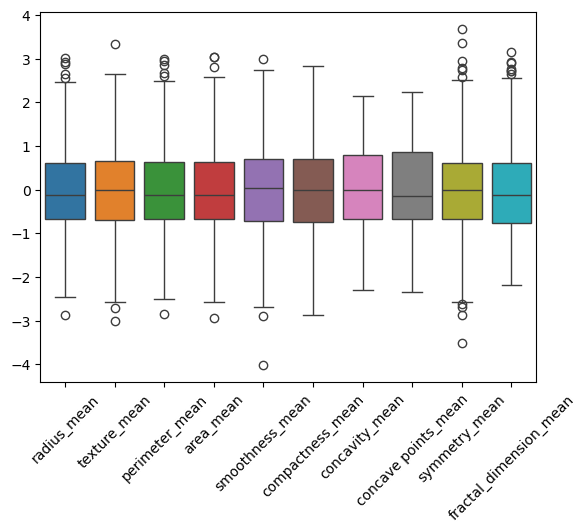

In [16]:
sns.boxplot(data=np.log(filtered_dataframe[predictors] + 0.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()
plt.close()

**Examine the Sigmoidal Curves**

The fundamental premise of logistic regression is that there exists a linear relationship between the features and the logit of the dependent variable. To visually assess this relationship, one can utilize Seaborn's ```regplot``` setting the parameter **logistic** to **True** and selecting our feature of interest as the **x value**. When this condition is satisfied, the resulting fitted model will exhibit a sigmoidal curve. 

The next step is to create another plot using the feature **fractal_dimension_mean**

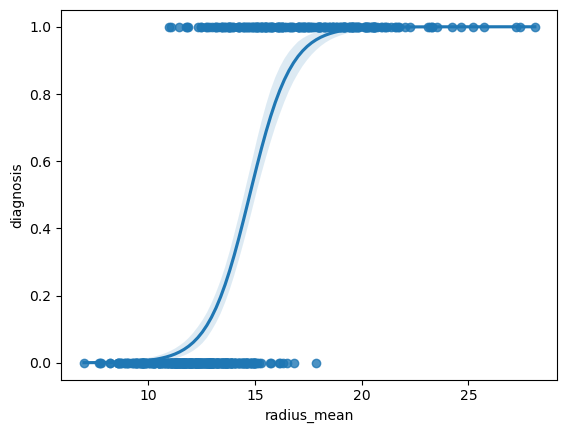

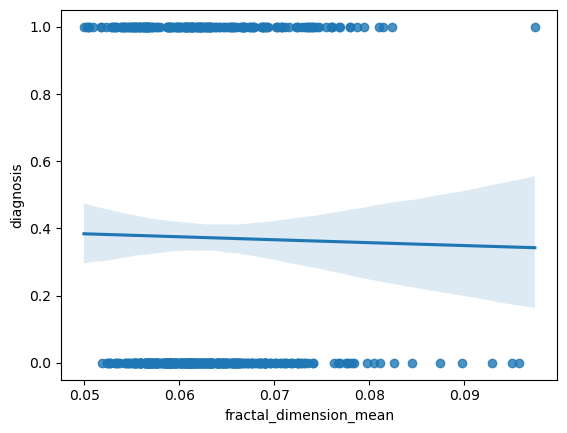

In [17]:
sns.regplot(
    x="radius_mean",
    y="diagnosis",
    data=df,
    logistic=True,
)

plt.show()
plt.close()
sns.regplot(x="fractal_dimension_mean", y="diagnosis", data=df, logistic=True)
plt.show()
plt.close()

**Spotlights** 

When x is set to radius_mean feature the sigmodial curve is evident unlike the fractal_dimension_mean feature.

**Examine Strong Correlations to 'radius_mean'**

Utilize a heatmap to determine the two features that exhibit a strong correlation with radius_mean.

<Axes: title={'center': 'All Correlations'}>

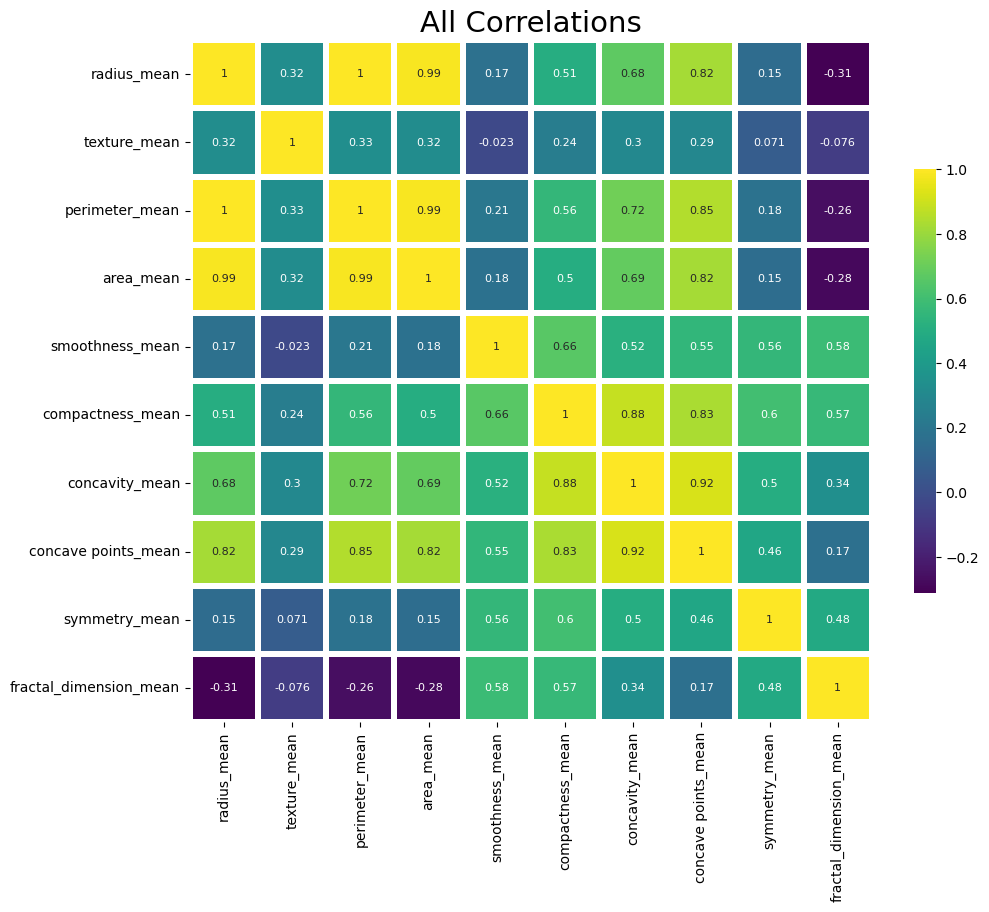

In [18]:
# Specify size and title for visualization
f, axes = plt.subplots(figsize=(11, 11))
plt.title("All Correlations", fontsize=21)

# Use Seaborn to plot the correlation matrix as a hetamap
sns.heatmap(
    df[predictors].corr(),
    linewidths=3.0,
    square=True,
    cmap="viridis",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.5},
)

**Spotlights**

- The heatmap indicates a strong positive correlation among **radius_mean, perimeter_mean, and concave_points_mean**. To mitigate the risk of multicollinearity, it would be advantageous to retain only one of these three features.
- The variables **'concavity_mean'** and **'compactness_mean'** represent another pair that exhibits a considerable correlation.

## Train a Logistic Regression Model

**Split the Data Into Training and Test Sets**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    df[predictors], df["diagnosis"], random_state=0, test_size=0.3
)

print(f"Original dataset:\n {df.shape}")
print("-------------------------------")
print(f"Training features: \n{x_train.shape}")
print(f"Testing features: \n{x_test.shape}")
print(f"Training labels: \n{y_train.shape}")
print(f"Testing labels: \n{y_test.shape}")

Original dataset:
 (569, 31)
-------------------------------
Training features: 
(398, 10)
Testing features: 
(171, 10)
Training labels: 
(398,)
Testing labels: 
(171,)


**Create Logistic Regression Model**

In [20]:
logistic_regression_model = LogisticRegression(
    penalty="none", fit_intercept=True, tol=0.0000001, solver="newton-cg"
)

print(f"Model Parameters:\n\n{logistic_regression_model.get_params()}\n")

Model Parameters:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'newton-cg', 'tol': 1e-07, 'verbose': 0, 'warm_start': False}



**Score Logistic Regression Model**

**Fit the Model**

In [21]:
logrstart = time()
logistic_regression_model.fit(x_train, y_train)
logrend = time()
lr_train_time = logrend - logrstart
# Score the model
lrgscore = logistic_regression_model.score(x_test, y_test)

print(
    "Logistic Regression model took: {:.2f} milliseconds to fit".format(lr_train_time)
)
print("Logistic Regression model score on test set: {:.0f}%".format(lrgscore * 100))

Logistic Regression model took: 0.09 milliseconds to fit
Logistic Regression model score on test set: 94%


**Procure Coefficients and Intercept**

In [22]:
coefficients = logistic_regression_model.coef_
intercept = logistic_regression_model.intercept_

print("\ncoefficeints: ", coefficients)
print("\nintercept: ", intercept, "\n")


coefficeints:  [[-2.51046302e+00  3.66070256e-01  1.16427680e-01  2.92251406e-02
   7.98693814e+01  2.48942620e+00  8.73784308e+00  6.08799323e+01
   1.48655732e+01 -9.49986821e+01]]

intercept:  [-9.71534744] 



## Performance Metrics

**Compute Accuracy, Precision, Recall, and F1-score**

Determine each score in order to evaluate the performance on the testing data.

In [23]:
y_prediction = logistic_regression_model.predict(x_test)
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

# Print scores
print(f"\nTest set accuracy:\t{accuracy}")
print(f"Test set precision:\t{precision}")
print(f"Test set recall:\t{recall}")
print(f"Test set f1-score:\t{f1}\n")


Test set accuracy:	0.9415204678362573
Test set precision:	0.9491525423728814
Test set recall:	0.8888888888888888
Test set f1-score:	0.9180327868852458



In our breast cancer dataset, it is crucial to classify all malignant cases accurately as malignant. While some benign cases may be incorrectly identified as malignant, these discrepancies are likely to be addressed through subsequent testing. Conversely, failing to identify a malignant case by labeling it as benign could lead to severe and potentially fatal outcomes. Therefore, **our primary objective is to reduce the occurrence of false negatives, which will enhance the recall ratio, also referred to as sensitivity or the true positive rate**.

**Create Function to Graph Confusion Matrix**

In [24]:
# Confusion Matrix Graphing Function


def graph_confusion_matrix(y, predictions, color="Blues"):
    matrix = confusion_matrix(y, predictions)

    ax = plt.subplot()

    sns.set(font_scale=1.2)
    sns.heatmap(matrix, annot=True, fmt="g", ax=ax, cmap=color)
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicition", fontsize=18)
    ax.set_ylabel("Actual", fontsize=18)
    ax.xaxis.set_ticklabels(["Benign (0)", "Malignant (1)"], fontsize=12, va="center")
    ax.yaxis.set_ticklabels(["Benign (0)", "Malignant (1)"], fontsize=12, va="center")


print("Defined confusion matrix graphinf function.")

Defined confusion matrix graphinf function.


**Test Confusion Matrix**

In [25]:
test_conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_prediction),
    index=["actual no", "actual yes"],
    columns=["predicted - no", "predicted - yes"],
)

print(test_conf_matrix)

            predicted - no  predicted - yes
actual no              105                3
actual yes               7               56


**Spotlights**

Among the 171 samples analyzed, 161 were accurately predicted, comprising 105 and 56 correct classifications.

In this assessment, seven individuals were incorrectly informed that their tumors were benign when, in fact, they were malignant, resulting in false negatives. Additionally, 3 individuals were mistakenly told their tumors were malignant, while they were actually benign, leading to false positives.

While the model demonstrated a reasonable level of accuracy, there remains room for enhancement, which is particularly important in the context of medical care.

## Threshold Enhancement

**Get the Predicted Probabilities**

In [26]:
y_prediction_probabilities = logistic_regression_model.predict_proba(x_test)

**Utilize the Forecasted Probabilities to Determine the Predicted Class**

In [27]:
y_prediction_class = (y_prediction_probabilities[:, 1] > 0.5) * 1.0

**Verify Whether y_prediction_class Matches y_prediction**

In [28]:
difference = np.array_equal(y_prediction_class, y_prediction)
difference = np.array_equal(y_prediction_class, y_prediction)

print(
    f"\nIs the value of y_prediction_class the same as that of y_prediction?  {difference}\n"
)


Is the value of y_prediction_class the same as that of y_prediction?  True



**Confusion Matrix - Threshold Value: default - 0.05**

To assess the performance of the model, it is essential to compute the confusion matrices for various threshold levels. Presented here is the confusion matrix from the previous analysis, utilizing the standard threshold.

In [29]:
print("Confusion Matrix: Threshold 50%")

confusion_matrix50 = confusion_matrix(y_test, y_prediction_class)

print(confusion_matrix50)

Confusion Matrix: Threshold 50%
[[105   3]
 [  7  56]]


**Graph Threshold 50% Confusion Matrix**

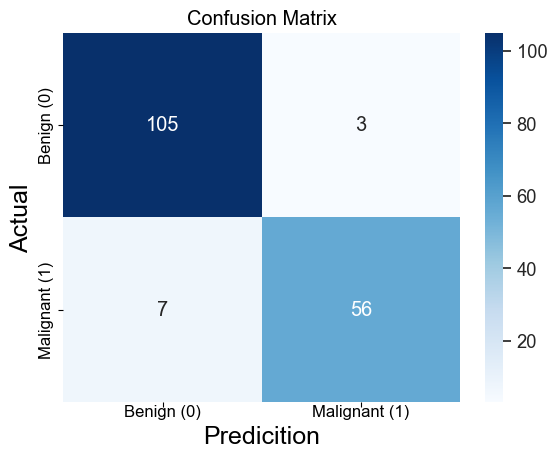

In [30]:
graph_confusion_matrix(y_test, y_prediction_class)

**Confusion Matrices Corresponding to Threshold Value: 0.25**

In [31]:
print("Confusion Matrix: Threshold 25%")

confusion_matrix25 = confusion_matrix(
    y_test, (y_prediction_probabilities[:, 1] > 0.25) * 1.0
)
print(confusion_matrix25)

Confusion Matrix: Threshold 25%
[[97 11]
 [ 6 57]]


**Graph Threshold 25% Confusion Matrix**

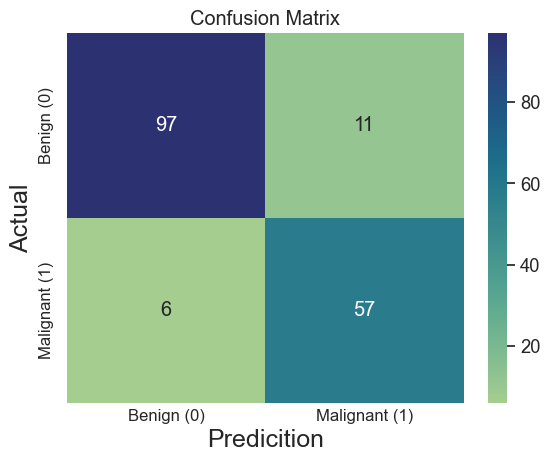

In [32]:
graph_confusion_matrix(y_test, (y_prediction_probabilities[:, 1] > 0.25) * 1.0, "crest")

**Spotlights** 

Among the 171 samples analyzed, 154 were accurately predicted, comprising 97 and 57 correct classifications. Six individuals were incorrectly informed that their tumors were benign when, in fact, they were malignant. 11 individuals were mistakenly told their tumors were malignant, while they were actually benign.

**Confusion Matrices Corresponding to Threshold Value: 0.75**

In [33]:
print("\nConfusion Matrix: Threshold 75%")

confusion_matrix75 = confusion_matrix(
    y_test, (y_prediction_probabilities[:, 1] > 0.75) * 1.0
)

print(confusion_matrix75)


Confusion Matrix: Threshold 75%
[[108   0]
 [  8  55]]


**Graph Threshold 75% Confusion Matrix**

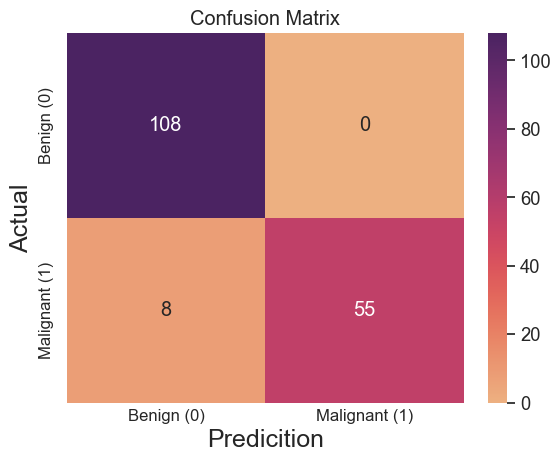

In [34]:
graph_confusion_matrix(y_test, (y_prediction_probabilities[:, 1] > 0.75) * 1.0, "flare")

Among the 171 samples analyzed, 163 were accurately predicted, comprising 108 and 55 correct classifications. Eight individuals were incorrectly informed that their tumors were benign when, in fact, they were malignant. Zero individuals were mistakenly told their tumors were malignant, while they were actually benign.

**Determining the Appropriate Threshold for a Query**

In this classification problem, the desire is to minimize the number of false negatives, i.e., correctly catch as many malignant cases as possible. Specifically, the goal is to set a threshold such that no more than 2 malignancies are misidentified, i.e., no more than 2 false negatives are allowed.

In [35]:
# Thresholds array
thresholds = np.linspace(0, 1, 100)
false_negatives = []

for t in thresholds:
    cm = confusion_matrix(y_test, (y_prediction_probabilities[:, 1] > t) * 1.0)
    false_negatives.append(cm[1][0])
threshold_choice = thresholds[np.argmax(np.array(false_negatives) >= 2)]
print(f"Threshold Choice: {threshold_choice}")

Threshold Choice: 0.13131313131313133


## Observe the ROC AUC Score

A single model can generate a range of predictions by incrementally adjusting the threshold from zero to one. For each threshold, it is possible to compute the True Positive Rate (TPR) and the False Positive Rate (FPR), which can then be visualized in a plot. The collection of these points creates what is referred to as the **Receiver Operating Characteristic (ROC) curve**.

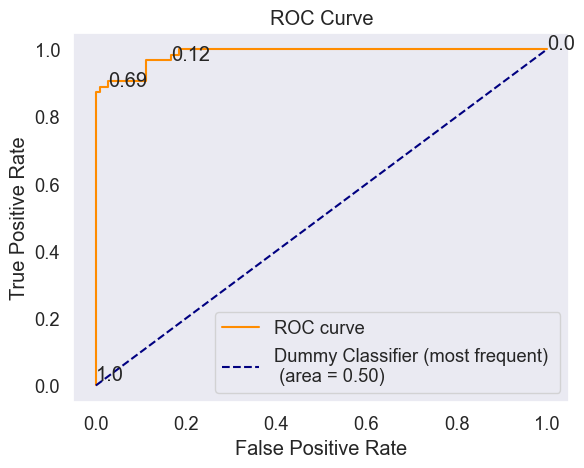

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_prediction_probabilities[:, 1]
)

plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color="darkorange", label="ROC curve")
idx = list(range(len(thresholds)))[1::4]

for i in idx:
    plt.text(false_positive_rate[i], true_positive_rate[i], thresholds[i].round(2))

classifier = DummyClassifier(strategy="most_frequent", random_state=0)
classifier.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, classifier.predict_proba(x_test)[:, 1]
)

plt.plot(
    false_positive_rate,
    true_positive_rate,
    color="navy",
    linestyle="--",
    label="Dummy Classifier (most frequent) \n (area = %0.2f)" % roc_auc,
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.legend(loc="lower right")
plt.show()

**Spotlights** 

_maximum threshold: 0.69_ **_minimum threshold: 0.12_**

For our classification challenge, a lower threshold around 0.12 appears to be the most suitable, as it would enhance the True Positive Rate, allowing for a more accurate diagnosis of malignant tumors. Our objective is to achieve an AUC score nearing 1, which would signify that the model effectively distinguishes between malignant and benign tumors.

**Determine Which Threshold is best for this Classification Problem**

While the ROC curve provides insights into the probabilities, the **Area Under the Curve (AUC) serves as a consolidated metric for assessing the model's ability to differentiate between classes**. A high AUC score, approaching 1, indicates an almost perfect classifier, while a score of 0.5 suggests performance equivalent to random chance. 

The specific threshold values are not directly identifiable from the curve, prompting the labeling of two thresholds for clarity. Additionally, the ROC curve of a "**dummy classifier**", which **predicts that all instances belong to the more prevalent class**, has also been included for comparison.

**Determine ROC AUC Score**

In [37]:
roc_auc = roc_auc_score(y_test, y_prediction_probabilities[:, 1])
print(f"ROC AUC score: {roc_auc}")

ROC AUC score: 0.9867724867724869


## Examine Class Imbalance

**Train and Test Positivity Rate**

The positivity rate serves as an indicator of the balance within the classes. It represents the frequency of the positive class's occurrence. In the context of the breast cancer dataset, the positivity rate can be calculated using the _formula_: **Positivity Rate = Total Malignant Cases / Total Cases**. A positivity **rate nearing 0.5** or 50% suggests that our classes are well-balanced.

In [38]:
print("Train positivity rate: ")
print(sum(y_train) / y_train.shape[0], "\n")

print("Test positivity rate:")
print(sum(y_test) / y_test.shape[0], "\n")

Train positivity rate: 
0.3743718592964824 

Test positivity rate:
0.3684210526315789 



### Stratification

When dealing with imbalanced classes, which is more common in smaller datasets, the disparity can become more pronounced after dividing the data into training and testing sets. To address this issue, one effective approach is to implement random splitting with stratification based on class labels. **Stratification involves organizing the data into subgroups to maintain a nearly uniform distribution of classes across both the training and testing datasets**. By applying stratification, the positivity rates in the training and testing sets should closely align, although it is important to note that this method does not guarantee that the positivity rate will approach 0.5.

**Stratified Sampling**

The next step creates a stratified train-test sample.

In [39]:
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(
    df[predictors],
    df["diagnosis"],
    random_state=6,
    test_size=0.3,
    stratify=df["diagnosis"],
)

**Examine Stratified Positivity Rates**

In [40]:
print("Stratified train positivity rate: ")

str_train_positivity_rate = sum(y_train_str) / y_train_str.shape[0]
print(str_train_positivity_rate, "\n")

print("Stratified test positivity rate: ")
str_test_positivity_rate = sum(y_test_str) / y_test_str.shape[0]

print(str_test_positivity_rate, "\n")

Stratified train positivity rate: 
0.37185929648241206 

Stratified test positivity rate: 
0.3742690058479532 



**Model predictions Post Stratified Sampling**

In [41]:
logistic_regression_model.fit(x_train_str, y_train_str)

y_pred = logistic_regression_model.predict(x_test_str)

recall_str = recall_score(y_test_str, y_pred)

accuracy_str = accuracy_score(y_test_str, y_pred)

print("Stratified Sampling: Recall and Accuracy scores")
print(recall_str, accuracy_str)

Stratified Sampling: Recall and Accuracy scores
0.9375 0.9590643274853801


**Balance Class Weights**

In [42]:
balanced_logistic_regression_model = LogisticRegression(
    penalty="none",
    max_iter=1000,
    fit_intercept=True,
    tol=0.000001,
    class_weight="balanced",
)

**Examine Model Predictions Post Balancing Class Weights**

In [43]:
balanced_logistic_regression_model.fit(x_train, y_train)
y_pred = balanced_logistic_regression_model.predict(x_test)

recall_balance = recall_score(y_test, y_pred)
accuracy_balance = accuracy_score(y_test, y_pred)
print("Balanced Class Weights: Recall and Accuracy scores\n")
print(f"Recall: {recall_balance}")
print(f"Accuracy: {accuracy_balance}")

Balanced Class Weights: Recall and Accuracy scores

Recall: 0.9206349206349206
Accuracy: 0.9239766081871345


### Determine Which Model Performs Best

**Initial Model**

In [44]:
print("Inital Model: Recall and Accuracy scores\n")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Inital Model: Recall and Accuracy scores

Recall: 0.8888888888888888
Accuracy: 0.9415204678362573


**Stratified Sampling Model**

In [45]:
print("Stratified Sampling: Recall and Accuracy scores\n")
print(f"Recall: {recall_str}")
print(f"Accuracy: {accuracy_str}")

Stratified Sampling: Recall and Accuracy scores

Recall: 0.9375
Accuracy: 0.9590643274853801


**Balanced Class Weights Model**

In [46]:
print("Balanced Class Weights: Recall and Accuracy scores\n")
print(f"Recall: {recall_balance}")
print(f"Accuracy: {accuracy_balance}")

Balanced Class Weights: Recall and Accuracy scores

Recall: 0.9206349206349206
Accuracy: 0.9239766081871345


## Implement K-Nearest Neighbors Classifier

The initial logistic regression model performed reasonably well on the breast cancer dataset; however, it is worthwhile to explore additional algorithms to potentially achieve improved outcomes. A straightforward alternative to logistic regression is the k-nearest neighbor algorithm. The next steps will develop this model utilizing the KNN approach to compare its performance against that of the logistic regression model. Given that the data has already been prepared, the majority of the groundwork is complete. It is just a matter of simply need proceeding with training and testing the new model.

In [47]:
from math import sqrt

from sklearn.neighbors import KNeighborsClassifier

# Use bootstrapping to find the ideal K-value
knum = round(sqrt(x_train.shape[0]))

# If k is even make it odd
if knum % 2 == 0:
    knum += 1
else:
    knum

# Train Model
knnclassifier = KNeighborsClassifier(n_neighbors=knum)

In [48]:
print("Value of k: {}".format(knum))

Value of k: 21


**Spotlights** 

- The bootstrapping technique yielded a k value of 21.
- This model serves as an alternative to the logistic regression model developed in the previous code blocks. While both models are designed for binary classification, constructing multiple models allows for comparison to identify the most effective one.
- In lines 8 to 12, the value of k is determined using a bootstrapping technique, which involves calculating the square root of the total number of training data examples. To prevent tie votes in the binary classification process, k is increased by 1 if it results in an even number.
- The exploration of different models enhances the understanding of their performance, and the bootstrapping method for determining k contributes to the robustness of the classification process.

**Fit the Model**

In [49]:
# x_train = dataset, y_train = labels
start = time()

knnclassifier.fit(x_train, y_train)

end = time()

train_time = (end - start) * 1000

**Make Predictions**

In [50]:
# Make predictions on data
results = x_test.copy()

results["PredictedCancer"] = knnclassifier.predict(x_test)

results["ActualCancer"] = y_test.copy()

results["MalignantProbability"] = np.round(
    knnclassifier.predict_proba(x_test)[:, 0] * 100, 2
)

results["BenignProbability"] = np.round(
    knnclassifier.predict_proba(x_test)[:, 1] * 100, 2
)

**Examine Predictions**

**Examine Results Post Fit**

In [51]:
results.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,PredictedCancer,ActualCancer,MalignantProbability,BenignProbability
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0,1,80.95,19.05
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0,0,76.19,23.81
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0,0,71.43,28.57
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0,0,57.14,42.86
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0,0,80.95,19.05
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,0,0,95.24,4.76
382,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0,0,100.00,0.00
310,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,0.1936,0.06128,0,0,95.24,4.76
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,0,0,100.00,0.00
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0,0,100.00,0.00


**Spotlights** 
The data presented follows the same structure as the previous logistic regression output; however, the predictions vary due to the application of a different model.

It is important to understand that k-NN does not produce prediction probabilities in the manner that logistic regression does. Instead, the predict_proba() method provides the proportion of neighbors that supported each label. For instance, in the initial row of results, approximately 81% of the neighbors indicated a preference for the label **0** malignant with roughly 17 out of a total of 21 neighbors voting in favor.

**Re-examine Data Shape for Reference**

In [52]:
print(f"Original dataset:\n {df.shape}")
print("-------------------------------")
print(f"Training features: \n{x_train.shape}")
print(f"Testing features: \n{x_test.shape}")
print(f"Training labels: \n{y_train.shape}")
print(f"Testing labels: \n{y_test.shape}")

Original dataset:
 (569, 31)
-------------------------------
Training features: 
(398, 10)
Testing features: 
(171, 10)
Training labels: 
(398,)
Testing labels: 
(171,)


**Make Predictions On Unseen Data**

In [53]:
# Make predictions on data
y_prediction_knn = knnclassifier.predict(x_train)

results_train = x_train.copy()

results_train["PredictedCancer"] = y_prediction_knn
results_train["ActualCancer"] = y_train.copy()

results_train["MalignantProbability"] = np.round(
    knnclassifier.predict_proba(x_train)[:, 0] * 100, 2
)

results_train["BenignProbability"] = np.round(
    knnclassifier.predict_proba(x_train)[:, 1] * 100, 2
)

results_train.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,PredictedCancer,ActualCancer,MalignantProbability,BenignProbability
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,0,0,100.00,0.00
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.017800,0.1482,0.06600,0,0,100.00,0.00
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.038850,0.023310,0.1970,0.06228,0,0,100.00,0.00
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,0.1621,0.05425,1,1,4.76,95.24
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,0,0,100.00,0.00
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,0,0,100.00,0.00
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,0,0,85.71,14.29
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,0.06105,0,0,90.48,9.52
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,0.05684,1,1,42.86,57.14
30,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.231900,0.124400,0.2183,0.06197,1,1,0.00,100.00


## Compute Accuracy, Precision, Recall, F<sub>1</sub>

In [54]:
accuracy = accuracy_score(y_train, y_prediction_knn)

precision = precision_score(y_train, y_prediction_knn)

recall = recall_score(y_train, y_prediction_knn)

f1 = f1_score(y_train, y_prediction_knn)

# Print scores
print(f"\nTest set accuracy:{accuracy}\n")
print(f"Test set precision:{precision}\n")
print(f"Test set recall:{recall}\n")
print(f"Test set f1-score:{f1}\n")


Test set accuracy:0.8793969849246231

Test set precision:0.9243697478991597

Test set recall:0.738255033557047

Test set f1-score:0.8208955223880597



**Score the KNN Model**

In [55]:
knnscore = knnclassifier.score(x_test, y_test)

print("Value of k: {}".format(knum))
print("KNN model took: {:.2f} milliseconds to fit".format(train_time))
print("KNN Score on test set: {:.0f}%".format(knnscore * 100))

Value of k: 21
KNN model took: 10.23 milliseconds to fit
KNN Score on test set: 92%


**Spotlights** 

- The KNN classification model consistently underperformed compared to the logistic regression model across all evaluated metrics.
- The k-nearest neighbor model achieved a score o 92%, which is slightly inferior to the performance of the logistic regression model at 94%; therefore, the logistic regression model will be prioritized for further evaluation and tuning.
- Nonetheless, it could be valuable to explore the differences in results between the two models.

## Fit Logistic Regression Using Grid Search

Given that the cross-validation (cv) is set to 5, the grid search will perform 5-fold cross-validation for every combination. This means that the model will be trained a total of 12 × 5 = 60 times.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
logistic_regression_gridsearch = LogisticRegression(random_state=1912)

# Create a parameter grid
grid = [
    {
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"],
        "C": [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
    },
    {
        "solver": ["sag"],
        "penalty": ["l2"],
        "C": [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
        "max_iter": [10000],
    },
]


search = GridSearchCV(
    logistic_regression_gridsearch, param_grid=grid, scoring="f1", cv=5
)

# Fit the model
search.fit(x_train, y_train)
print(search.best_params_)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Evaluate the Optimized Model

In [58]:
search_predictions = search.predict(x_test)

search_confusion_matrix = confusion_matrix(y_test, search_predictions)
print(search_confusion_matrix)

[[105   3]
 [  6  57]]


**Graph Search Confusion Matrix**

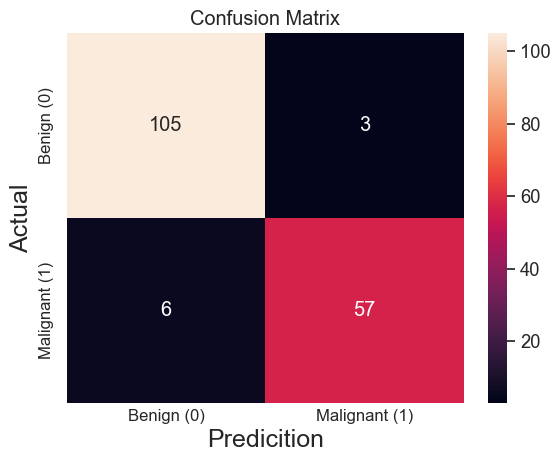

In [59]:
graph_confusion_matrix(y_test, search_predictions, "rocket")

**Spotlights** 

Initial LR Model Confusion Matrix Results 

```
Confusion Matrix: Threshold 50%
[[105   3]
 [  7  56]]
```

The performance of optimized model is inferior to that of non-optimized logistic regression model. There is a decline in True Positives and a rise in False Negatives. This outcome is certainly counterproductive, despite the small numerical difference, as the objective is to minimize the misclassification of malignant cells as benign.